# 16장. 모델 저장하기와 불러오기
## 16.1 저장하기

In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 생성
np.random.seed(327)
x_train = np.linspace(-1,1,50)
y_train = x_train**3 + 0.1 * x_train**2 -0.15 * x_train + 1.0 + 0.5 * np.random.rand(len(x_train))

x_test = np.linspace(-1,1,50)
y_test = x_test**3 + 0.1 * x_test**2 -0.15 * x_test + 1.0 + 0.5 * np.random.rand(len(x_test))

In [3]:
# 특성값 정의
features_train = np.array([[xval] for xval in x_train])
labels_train = y_train.reshape(-1, 1)

features_test = np.array([[xval] for xval in x_test])
labels_test = y_test.reshape(-1, 1)

In [4]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1., seed=119)

class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 10 
        num_hidden2 = 5
        beta = 1E-5/2

        self.hidden1 = tf.keras.layers.Dense(num_hidden1, activation=tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='hidden_1', kernel_regularizer=tf.keras.regularizers.L2(beta))

        self.hidden2 = tf.keras.layers.Dense(num_hidden2, activation=tf.nn.sigmoid, 
            kernel_initializer=initializer, bias_initializer=initializer, name='hidden_2', kernel_regularizer=tf.keras.regularizers.L2(beta))
    
        self.out = tf.keras.layers.Dense(1, activation = None, 
            kernel_initializer=initializer, bias_initializer=initializer, name='output', kernel_regularizer=tf.keras.regularizers.L2(beta))

    def call(self, x):
        h1 = self.hidden1(x)
        h2 = self.hidden2(h1)
        yhat = self.out(h2)
        return yhat

In [5]:
model = MyModel()

In [6]:
checkpoint = tf.train.Checkpoint(model)

In [7]:
MaxEpochs = 4000
batch_size = 10
lr = 0.05
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

np.random.seed(320)
shuffled_id = np.arange(0, len(x_train))
np.random.shuffle(shuffled_id)
shuffled_x_train = features_train[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

model.compile(optimizer = optimizer, loss = loss)
history = model.fit(shuffled_x_train, shuffled_y_train, epochs = MaxEpochs, 
                    batch_size = batch_size, shuffle = False, validation_data = (features_test, labels_test))

Epoch 1/4000
5/5 [==============================] - 1s 31ms/step - loss: 0.1084 - val_loss: 0.0940
Epoch 2/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0818 - val_loss: 0.0708
Epoch 3/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0679 - val_loss: 0.0698
Epoch 4/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0582 - val_loss: 0.0712
Epoch 5/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0624 - val_loss: 0.0717
Epoch 6/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0572 - val_loss: 0.0675
Epoch 7/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0559 - val_loss: 0.0673
Epoch 8/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0560 - val_loss: 0.0676
Epoch 9/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0545 - val_loss: 0.0645
Epoch 10/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0544 - val_loss: 0.0643
Epoch 11/4000
5/5 

Epoch 84/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0192 - val_loss: 0.0210
Epoch 85/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0192 - val_loss: 0.0210
Epoch 86/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.0210
Epoch 87/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0192 - val_loss: 0.0209
Epoch 88/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.0209
Epoch 89/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.0209
Epoch 90/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.0208
Epoch 91/4000
5/5 [==============================] - 0s 6ms/step - loss: 0.0191 - val_loss: 0.0208
Epoch 92/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0191 - val_loss: 0.0208
Epoch 93/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0191 - val_loss: 0.0208
Epoch 94/4

5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 167/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 168/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 169/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 170/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 171/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 172/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 173/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 174/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 175/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0187 - val_loss: 0.0199
Epoch 176/4000


5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 249/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 250/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 251/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 252/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 253/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 254/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 255/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 256/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 257/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0196
Epoch 258/4000


5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 331/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 332/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 333/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 334/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 335/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 336/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 337/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 338/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 339/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0194
Epoch 340/4000


5/5 [==============================] - 0s 6ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 413/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 414/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 415/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 416/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 417/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 418/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 419/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 420/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 421/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 422/4000


5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 495/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 496/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 497/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 498/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 499/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 500/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 501/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 502/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 503/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 504/4000


5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 577/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 578/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 579/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 580/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 581/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 582/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 583/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 584/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 585/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0192
Epoch 586/4000


5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 659/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 660/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 661/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 662/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 663/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 664/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 665/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 666/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 667/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 668/4000


5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 741/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 742/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 743/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 744/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 745/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 746/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 747/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 748/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 749/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 750/4000


5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 823/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 824/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 825/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 826/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 827/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 828/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 829/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 830/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 831/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0191
Epoch 832/4000


5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 905/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 906/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 907/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 908/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 909/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 910/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 911/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 912/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 913/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 914/4000


5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 987/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 988/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 989/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 990/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 991/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 992/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 993/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 994/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 995/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 996/4000


5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1068/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1069/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1070/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1071/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1072/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1073/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1074/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1075/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 1076/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1149/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1150/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1151/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1152/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1153/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1154/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1155/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1156/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1157/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1230/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1231/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1232/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1233/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1234/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1235/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1236/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1237/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1238/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1311/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1312/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1313/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1314/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1315/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1316/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1317/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1318/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1319/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1392/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1393/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1394/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1395/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1396/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1397/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1398/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1399/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1400/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1473/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1474/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1475/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1476/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1477/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1478/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1479/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1480/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1481/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1554/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1555/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1556/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1557/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1558/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1559/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1560/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1561/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1562/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1635/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1636/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1637/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1638/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1639/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1640/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1641/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1642/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1643/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1716/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1717/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1718/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1719/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1720/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1721/4000
5/5 [==============================] - 0s 5ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1722/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1723/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1724/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1797/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1798/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1799/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1800/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1801/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1802/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1803/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1804/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1805/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1878/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1879/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1880/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1881/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1882/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1883/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1884/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1885/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1886/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1959/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1960/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1961/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1962/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1963/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1964/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1965/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1966/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 1967/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2040/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2041/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2042/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2043/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2044/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2045/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2046/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2047/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 2048/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2121/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2122/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2123/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2124/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2125/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2126/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2127/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2128/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2129/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2202/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2203/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2204/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2205/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2206/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2207/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2208/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2209/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2210/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2283/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2284/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2285/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2286/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2287/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2288/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2289/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2290/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2291/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2364/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2365/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2366/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2367/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2368/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2369/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2370/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2371/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2372/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2445/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2446/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2447/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2448/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2449/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2450/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2451/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2452/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2453/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2526/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2527/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2528/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2529/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2530/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2531/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2532/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2533/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2534/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2607/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2608/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2609/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2610/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2611/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2612/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2613/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2614/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2615/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2688/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2689/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2690/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2691/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2692/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2693/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2694/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2695/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2696/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2769/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2770/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2771/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2772/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2773/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2774/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2775/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2776/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2777/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2850/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2851/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2852/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2853/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2854/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2855/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2856/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2857/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2858/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2931/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2932/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2933/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2934/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2935/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2936/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2937/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2938/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 2939/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3012/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3013/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3014/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3015/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3016/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3017/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3018/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3019/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3020/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3093/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3094/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3095/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3096/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3097/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3098/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3099/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3100/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3101/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3174/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3175/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3176/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3177/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3178/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3179/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3180/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3181/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3182/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3255/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3256/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3257/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3258/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3259/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3260/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3261/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3262/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3263/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3336/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3337/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3338/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3339/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3340/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3341/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3342/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 3343/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3344/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0189
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3417/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3418/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3419/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3420/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3421/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3422/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3423/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 3424/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3425/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0182 - val_loss: 0.0190
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 3498/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3499/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 3500/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3501/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 3502/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3503/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 3504/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 3505/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0183 - val_loss: 0.0190
Epoch 3506/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0181 - val_loss: 0.0189
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0188
Epoch 3579/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.0192
Epoch 3580/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0179 - val_loss: 0.0188
Epoch 3581/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0186 - val_loss: 0.0192
Epoch 3582/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.0187
Epoch 3583/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0192
Epoch 3584/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.0187
Epoch 3585/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0192
Epoch 3586/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.0187
Epoch 3587/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0186 - val_loss: 0.0192
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.0217
Epoch 3660/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0185
Epoch 3661/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.0218
Epoch 3662/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0185
Epoch 3663/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.0219
Epoch 3664/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0185
Epoch 3665/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0218 - val_loss: 0.0219
Epoch 3666/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0185
Epoch 3667/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.0219
Epoch 3668/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0186
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0187
Epoch 3741/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 3742/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0187
Epoch 3743/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 3744/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0178 - val_loss: 0.0187
Epoch 3745/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 3746/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.0187
Epoch 3747/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.0193
Epoch 3748/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.0187
Epoch 3749/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0184 - val_loss: 0.0192
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.0194
Epoch 3822/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0186
Epoch 3823/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0187 - val_loss: 0.0194
Epoch 3824/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0177 - val_loss: 0.0186
Epoch 3825/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0194
Epoch 3826/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0186
Epoch 3827/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0194
Epoch 3828/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0186
Epoch 3829/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0195
Epoch 3830/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0186
Epoch 

5/5 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 3903/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0203
Epoch 3904/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 3905/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0198 - val_loss: 0.0203
Epoch 3906/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 3907/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.0203
Epoch 3908/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 3909/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0198 - val_loss: 0.0203
Epoch 3910/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0184
Epoch 3911/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0197 - val_loss: 0.0203
Epoch 

5/5 [==============================] - 0s 4ms/step - loss: 0.0189 - val_loss: 0.0196
Epoch 3984/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0186
Epoch 3985/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0188 - val_loss: 0.0196
Epoch 3986/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0186
Epoch 3987/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0195
Epoch 3988/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0186
Epoch 3989/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0195
Epoch 3990/4000
5/5 [==============================] - 0s 3ms/step - loss: 0.0176 - val_loss: 0.0186
Epoch 3991/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0188 - val_loss: 0.0195
Epoch 3992/4000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0186
Epoch 

In [8]:
checkpoint.save(file_prefix = './checkpoints/nn_regression_model.ckpt')

'./checkpoints/nn_regression_model.ckpt-1'

In [9]:
def visualize_l2(pred, x_train, y_train, x_test, y_test):
    from matplotlib.patches import Rectangle
    plt.plot(x_train, y_train, '.k', markersize=7, markerfacecolor='none', label='Train Data')
    plt.plot(x_train, pred,  '--k', label='Model')
    plt.plot(x_test, y_test, 'xk', markersize=4, markerfacecolor='none', label='Test Data')
    currentAxis = plt.gca()
    for k, (xx,yy) in enumerate(zip(x_train, y_train)):
        error = pred[k] - yy
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        error, error,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')

In [10]:
prediction_values = model(features_train)
final_loss = model.evaluate(features_train,labels_train)
prediction_values_test = model(features_test)
final_loss_test = model.evaluate(features_test,labels_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.0186


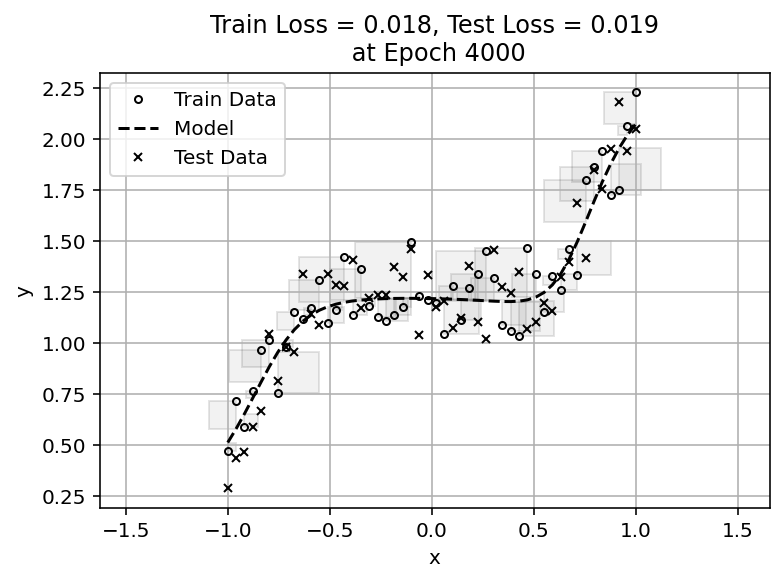

In [11]:
plt.title("Train Loss = {:1.3f}, Test Loss = {:1.3f}\n at Epoch {}".format(final_loss, final_loss_test, MaxEpochs))
visualize_l2(prediction_values.numpy().reshape(-1), x_train, y_train, x_test, y_test)
plt.show()

## 16.2 불러오기

In [12]:
model2 = MyModel()

checkpoint = tf.train.Checkpoint(model2)
checkpoint.restore(tf.train.latest_checkpoint("./checkpoints"))

In [13]:
lr = 0.05
optimizer = tf.keras.optimizers.Adam(lr)
loss = tf.keras.losses.MeanSquaredError()

model2.compile(optimizer = optimizer, loss = loss)

In [14]:
prediction_values = model2(features_train)
final_loss = model2.evaluate(features_train,labels_train)
prediction_values_test = model2(features_test)
final_loss_test = model2.evaluate(features_test,labels_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.0186


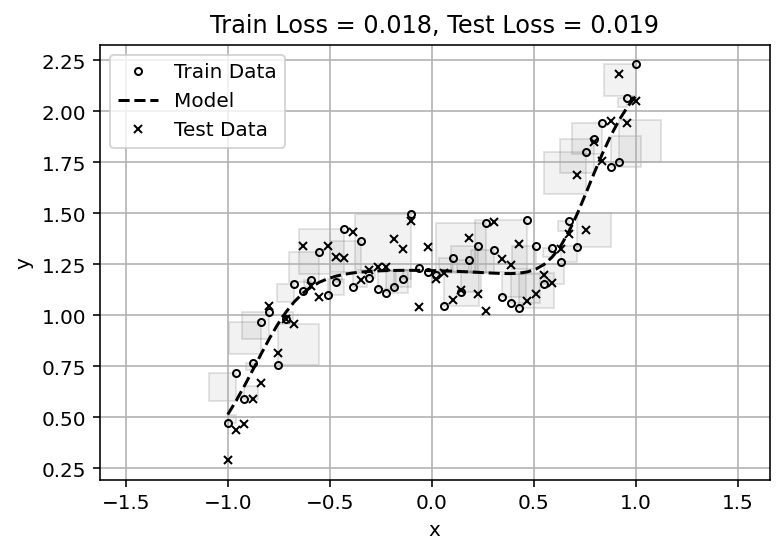

In [15]:
plt.title("Train Loss = {:1.3f}, Test Loss = {:1.3f}".format(final_loss, final_loss_test))
visualize_l2(prediction_values.numpy().reshape(-1), x_train, y_train, x_test, y_test)
plt.show()

## 16.3 오버피팅 현상 해결 응용 예제

In [16]:
from sklearn.datasets import make_circles

# 학습용 데이터 생성
xy_train, labels_train = make_circles(n_samples=50, noise=0.1, random_state=717)
labels_train = labels_train.reshape(-1,1)

# 테스트용 데이터 생성
xy_test, labels_test = make_circles(n_samples=50, noise=0.1, random_state=712)
labels_test = labels_test.reshape(-1,1)

# 특성값 정의
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy_train])
features_test = np.array([f_fn(xval, yval) for xval, yval in xy_test])

In [17]:
class MyModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        num_hidden1 = 64
        num_hidden2 = 32

        self.W1 = tf.Variable(tf.random.normal([2, num_hidden1], seed=624)) 
        self.b1 = tf.Variable(tf.random.normal([num_hidden1], seed=624)) 

        self.W2 = tf.Variable(tf.random.normal([num_hidden1, num_hidden2], seed=624)) 
        self.b2 = tf.Variable(tf.random.normal([num_hidden2], seed=624)) 

        self.W3 = tf.Variable(tf.random.normal([num_hidden2, 1], seed=624)) 
        self.b3 = tf.Variable(tf.random.normal([1], seed=624)) 

    def call(self, x):
        l1 = tf.matmul(x, self.W1) + self.b1
        h1 = tf.nn.sigmoid(l1)

        l2 = tf.matmul(h1, self.W2) + self.b2
        h2 = tf.nn.sigmoid(l2)

        l3 = tf.matmul(h2, self.W3) + self.b3
        yhat = tf.nn.sigmoid(l3)
        return yhat

In [18]:
model = MyModel()

In [19]:
checkpoint_directory = "./checkpoints"
checkpoint = tf.train.Checkpoint(model)
manager = tf.train.CheckpointManager(checkpoint, checkpoint_directory, max_to_keep=20, 
                                     checkpoint_name='nn_binary_classification_ckpt')

In [20]:
MaxEpochs = 2000
batch_size = 10
lr = 0.5
optimizer = tf.keras.optimizers.SGD(lr)
loss = lambda y, yhat: tf.reduce_mean(-y * tf.math.log(yhat) - (1-y) * tf.math.log(1-yhat))

np.random.seed(320)
shuffled_id = np.arange(0, len(features))
np.random.shuffle(shuffled_id)
shuffled_x_train = features[shuffled_id]
shuffled_y_train = labels_train[shuffled_id]

In [21]:
from helper import generate_batches
for epoch in range(MaxEpochs):
    if epoch % 100 == 0:
        curr_loss = loss(labels_train, model(features))
        print(epoch, curr_loss.numpy())
        manager.save(checkpoint_number=epoch)
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train):
        with tf.GradientTape() as tape:
            curr_loss = loss(y_batch, model(x_batch))
            gradients = tape.gradient(curr_loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

0 1.5324414
100 0.5616237
200 0.40906295
300 0.3290962
400 0.26899776
500 0.2372119
600 0.19568816
700 0.17615753
800 0.16422318
900 0.15450211
1000 0.1465556
1100 0.13912234
1200 0.13154691
1300 0.12393429
1400 0.11754244
1500 0.11275589
1600 0.1091468
1700 0.10633894
1800 0.0878771
1900 0.085382186


In [22]:
manager.save(checkpoint_number=MaxEpochs)

'./checkpoints/nn_binary_classification_ckpt-2000'

In [23]:
def accuracy(x,y):
    yhat = model(x)
    correct_prediction = tf.equal(y, tf.round(yhat))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
prediction_values = model(features)
final_loss_train = loss(labels_train, prediction_values)
final_acc_train = accuracy(features, labels_train)

prediction_values_test = model(features_test)
final_loss_test = loss(labels_test, prediction_values_test)
final_acc_test = accuracy(features_test, labels_test)

In [25]:
def plot_model(model, feature_labmda, xy, labels, xy2, labels2, title=''):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.3,1.3, 400), np.linspace(-1.3,1.3, 400))
    input_xy = np.array([feature_labmda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])
    prediction = model(input_xy).numpy()
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(7, 7))
    cs = ax.contourf(xx, yy, Z, 20, cmap='coolwarm', alpha=.8)
    ax.clabel(cs, colors='k')
    cs = ax.contour(xx, yy, Z, cmap='coolwarm', levels=[0, 0.5], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')

    markers = {0:'ws', 1:'w^'}    
    df = DataFrame(dict(x=xy2[:,0], y=xy2[:,1], label=labels2.flatten()))
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels2[k][0]], mec='k', alpha=0.7)

    ax.set_xlim([-1.3, 1.3])
    ax.set_ylim([-1.3, 1.3])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

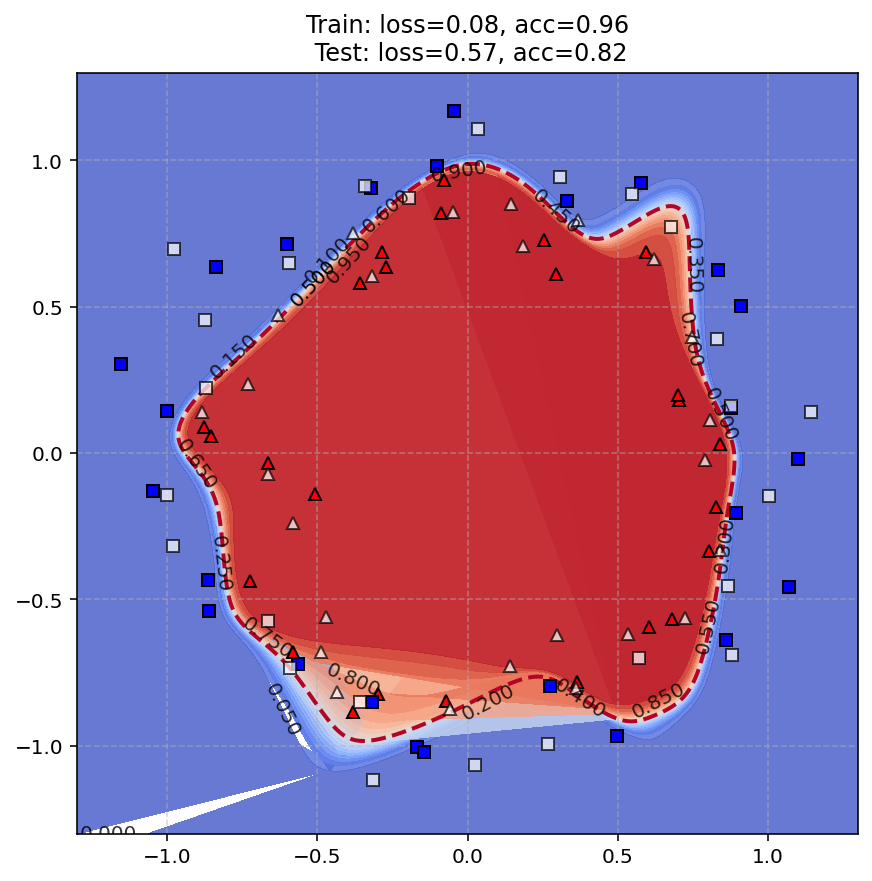

In [26]:
plot_model(model, f_fn, xy_train, labels_train, xy_test, labels_test, 
	'Train: loss={:1.2f}, acc={:1.2f}\n Test: loss={:1.2f}, acc={:1.2f}'.format(final_loss_train, final_acc_train, final_loss_test, final_acc_test))

In [27]:
model2 = MyModel()
checkpoint = tf.train.Checkpoint(model2)

myEpoch = 100
save_path = './checkpoints/nn_binary_classification_ckpt-{}'.format(myEpoch)
checkpoint.restore(save_path)

In [28]:
prediction_values = model2(features)
final_loss_train = loss(labels_train, prediction_values)
final_acc_train = accuracy(features, labels_train)

prediction_values_test = model2(features_test)
final_loss_test = loss(labels_test, prediction_values_test)
final_acc_test = accuracy(features_test, labels_test)

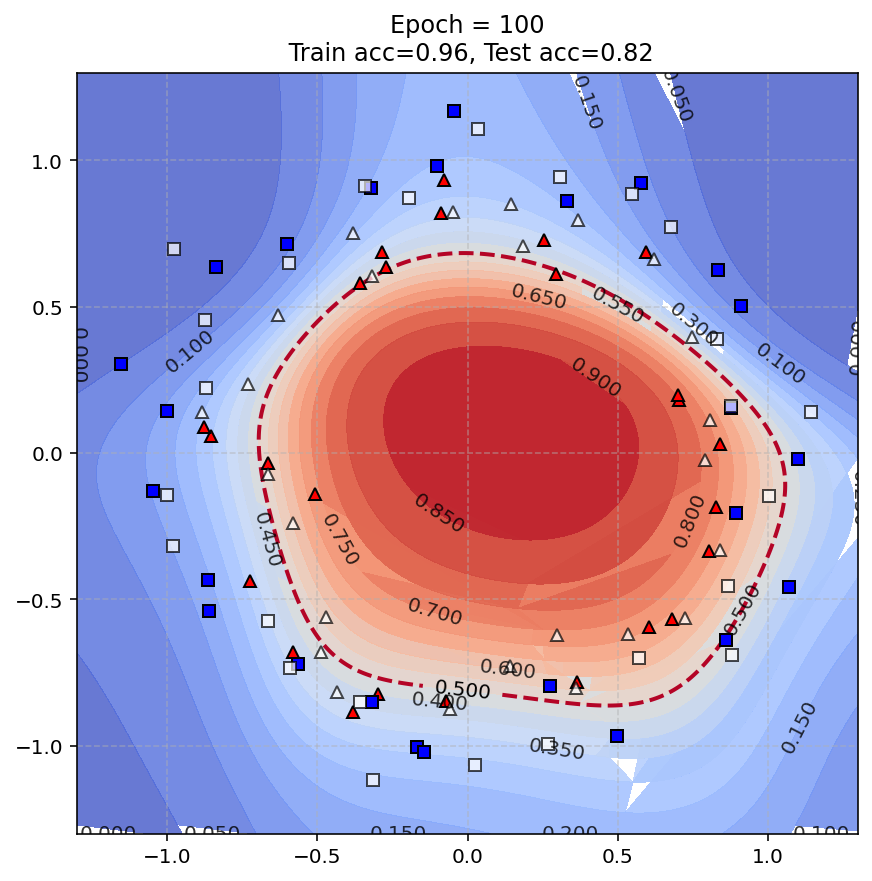

In [29]:
plot_model(model2, f_fn, xy_train, labels_train, xy_test, labels_test, 
    'Epoch = {}\n Train acc={:1.2f}, Test acc={:1.2f}'.format(myEpoch, final_acc_train, final_acc_test))